#YOLO V8 GÖRÜNTÜ SINIFLANDIRMA

#ORTAM HAZIRLIĞI


In [1]:
#Drive Bağlanma
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication


/content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication


In [3]:
#Ultraltics'i İndir
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/107.7 GB disk)


#SINIFLANDIRMA / PREDİCTİON

In [13]:
#Resim Sınıflandırma / Test / ImageNet
!yolo classify predict model = yolov8l-cls.pt source="/content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/inference" save = True




Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 37,465,576 parameters, 0 gradients, 99.7 GFLOPs

image 1/5 /content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/inference/predict11.jpg: 224x224 Granny_Smith 0.99, fig 0.00, jack-o'-lantern 0.00, caldron 0.00, nail 0.00, 278.3ms
image 2/5 /content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/inference/predict12.jpeg: 224x224 puck 0.22, lens_cap 0.12, stethoscope 0.11, loupe 0.11, Dutch_oven 0.06, 242.5ms
image 3/5 /content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/inference/predict5.jpg: 224x224 warplane 0.81, projectile 0.09, missile 0.05, wing 0.03, airliner 0.01, 241.2ms
image 4/5 /content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/inference/predict6.jpg: 224x224 daisy 0.64, hair_slide 0.17, ant 0.04, pot 0.02, fly 0.02, 251.5ms
image 5/5 /content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/inference/predict7.png: 224x224 s

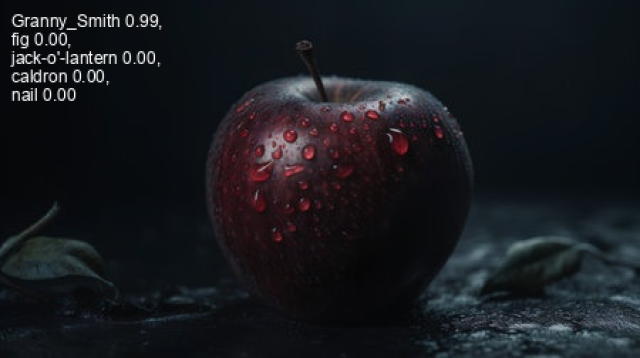

In [15]:
#SONUÇLARI İNCELE
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8_Projeleri/0_image_classication/runs/classify/predict/predict11.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)
cv2_imshow(img)




#PYTHON KODLARIYLA AYNI DEĞERLERE ULAŞMA

In [ ]:
import numpy as np
from ultralytics import YOLO

img_path = "runs/classify/predict/predict1.jpg"
model_path = "/yolov8l-cls.pt"

model = YOLO(model_path)   #modeli yükle
results = model(img_path)  #resmi yükle ve sınıflandır

class_dict = results[0].names    #BURADA BUNA NE ÇOK BENZİYEN SINIFLARI ORTAYA ÇIKARIORUZ
probs = results[0].probs.data.tolist() #BURADA İSE HANGİ SINIFA BENZEME OLASILIĞINI GÖSTERİYO EN ÇOK DEĞERİ OLAN SSINIFA AİT OLUYOR

print("Sınıflar", class_dict)
print("Olasılıklar", probs)

print("Sonuç: ", class_dict[np.argmax(probs)])     #BURADA OLASILIĞI EN YÜKSEK OLAN SINIFA AİT OLUR





image 1/1 /content/drive/MyDrive/YOLOv8/0_image_classication/runs/classify/predict/predict1.jpg: 224x224 toy_poodle 0.34, miniature_poodle 0.23, standard_poodle 0.10, Maltese_dog 0.09, tennis_ball 0.08, 279.8ms
Speed: 13.7ms preprocess, 279.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Sınıflar {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'commo